Written by Zain Nasrullah for SCS 3251

In [2]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data
df = pd.read_csv('mosquitos_data.csv')

# Look the data
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


In [4]:
# Quick analysis of the sample dataset
df.describe()

,Response
count,43.000000
mean,21.767442
std,4.471269
min,12.000000
25%,19.000000
50%,21.000000
75%,24.000000
max,31.000000


In [5]:
# Explore data types: Treatment is a categorical variable (nomial) and Response is a numerical variable (discrete)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
Response     43 non-null int64
Treatment    43 non-null object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [219]:
# Two responses: Beer (25 records) & Water (18 records)
df.groupby('Treatment').count()

,Response
Treatment,
Beer,25
Water,18


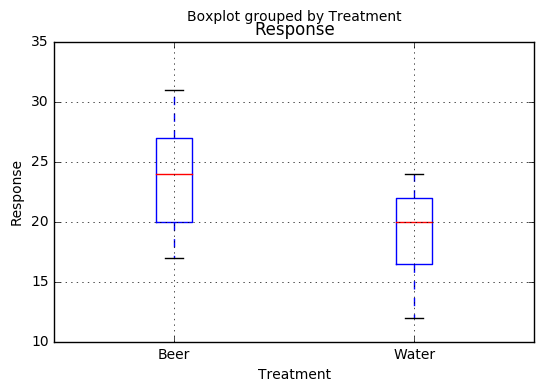

In [11]:
# Visualize the data
df.boxplot(by='Treatment');
plt.ylabel('Response')
plt.xlabel('Treatment')

From the box plot, we may observe that the inner quartiles (Q1,Q2,Q3) and outer limits in the Beer boxplot are larger than their  the Water boxplot counterparts. Consequentuly, there does seem to be an association beer consumption and attractiveness to mosquitos when compared to Water Consumption. 

In [48]:
# Water Consumption basic statistics (50% is the Median)
df[df['Treatment'] == 'Water'].describe()

,Response
count,18.000000
mean,19.222222
std,3.671120
min,12.000000
25%,16.500000
50%,20.000000
75%,22.000000
max,24.000000


In [49]:
# Beer Consumption basic statistics (50% is the Median)
df[df['Treatment'] == 'Beer'].describe()

,Response
count,25.000000
mean,23.600000
std,4.133199
min,17.000000
25%,20.000000
50%,24.000000
75%,27.000000
max,31.000000


The mean values above show that in our sample, on average, a larger number of mosquitos responded to Beer Consumption. In comparison to the total sample mean, the number of mosquitos responding to beer is larger of the two groups. The median values similarly show that the middle response in each sorted list of responses is larger in the beer group. This validates our boxplot insight suggesting that Beer Consumption is associated with attracting more mosquitos-- at least relative to Water Consumption. 

The standard deviation shows that there is more variation relative to the mean in the Beer group than the Water group in our sample. However, one should consider that there are a larger number of observations in the Beer group which may influence the summary statistics. 

As mentioned in the video in class, the difference in mean (~4.4) is quite large relative to the standard deviation. Again, this further supports the idea that an association exists. 

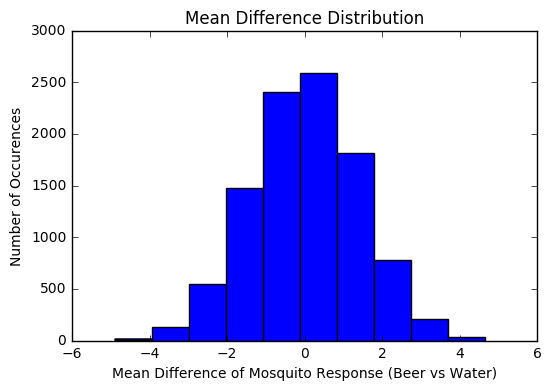

In [222]:
# Simulation

# Initialize list to store mean differences and set number of trials
mean_diff_list = []
trials = 10000

# Iterate through number of trials
for i in range(0,trials):
    
    # Create a new data frame with the same number of Beer & Water observations
    # Use the sample method in pandas to create a new column with randomly sorted Response data 
    df_com = pd.DataFrame(df['Treatment'])
    df_com['Response'] = list(df['Response'].sample(frac=1))
    
    # Calculate and append the new mean difference
    mean_diff = df_com[df_com.Treatment == 'Beer'].mean() - df_com[df_com.Treatment == 'Water'].mean()
    mean_diff_list.append(float(mean_diff))

# Plot a histogram which summarizes the results
plt.hist(mean_diff_list)
plt.xlabel('Mean Difference of Mosquito Response (Beer vs Water)')
plt.ylabel('Number of Occurences')
plt.title("Mean Difference Distribution")

As mentioned in the video and discussed in class, if the data is randomized such that the label (Beer or Water) does not matter, there is an extremely low probability of observing a mean difference (mean response to beer consumption minus mean response to water consumption) of 4.4 which as observed in the histogram.

This suggests that our intuition is correct and that we can reject the 'skeptic's assertion' that this result occured by chance. 